<a href="https://colab.research.google.com/github/kynemre/Covid_19/blob/master/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Veri Dosyasını Alma

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/kynemre/Covid_19/master/covid_19_clean_complete.csv')

#Veri dosyasını Temizleme

In [0]:
data['Province/State'] = data['Province/State'].fillna(data['Country/Region'])

In [0]:
data['Date'] = data['Date'].str.replace(r'(\d+)/(\d+)/(\d+)', r'20\3-\1-\2')
data['Date'] = pd.to_datetime(data['Date'])

In [0]:
#Artış miktarını bulmak için fonksiyon
def artis(liste):
  yeni_liste = list()
  yeni_liste.append(0)
  for i in range(len(liste)-1):
    yeni_liste.append(liste[i+1]-liste[i])
  return yeni_liste



#Veriyi Görselleştirme

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

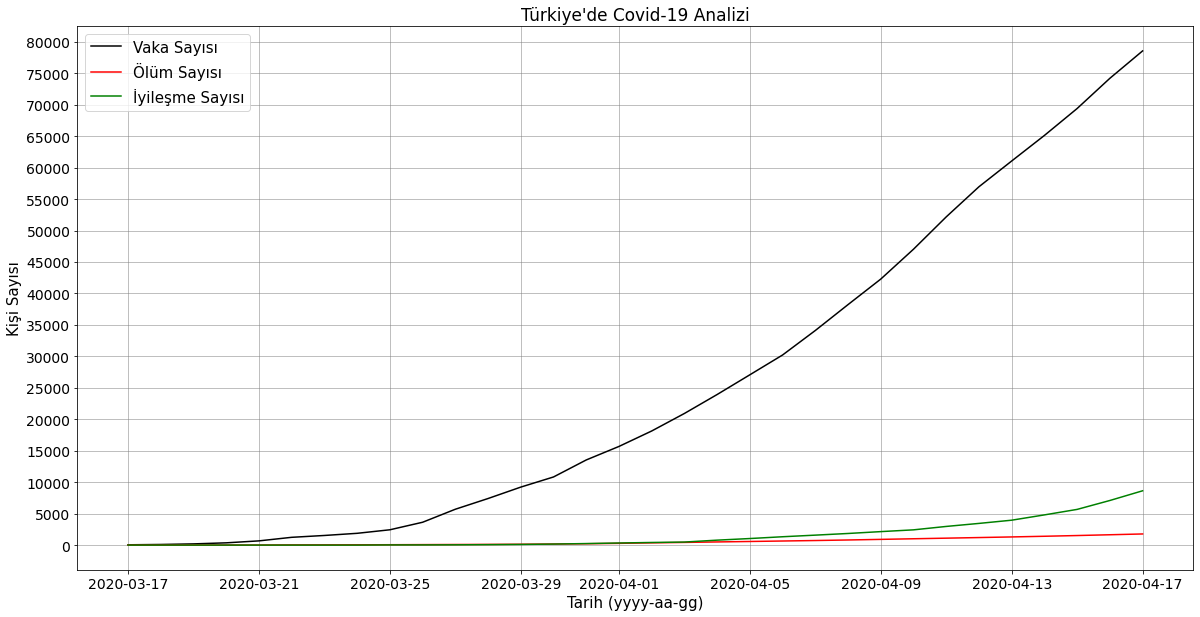

In [111]:
plt.figure(figsize=(20,10))
plt.rc(['xtick','ytick'], labelsize=14)
plt.yticks(np.arange(0, max(data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Confirmed'])+5000, 5000.0))

plt.plot(data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Date'], 
         data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Confirmed'], c='Black', label = "Vaka Sayısı")

plt.plot(data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Date'], 
         data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Deaths'], c='Red', label = "Ölüm Sayısı")

plt.plot(data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Date'], 
         data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Recovered'], c='Green', label = "İyileşme Sayısı")

plt.xlabel('Tarih (yyyy-aa-gg)', fontsize=15)
plt.ylabel('Kişi Sayısı', fontsize=15)
plt.title("Türkiye'de Covid-19 Analizi", fontsize=17)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(fontsize=15)

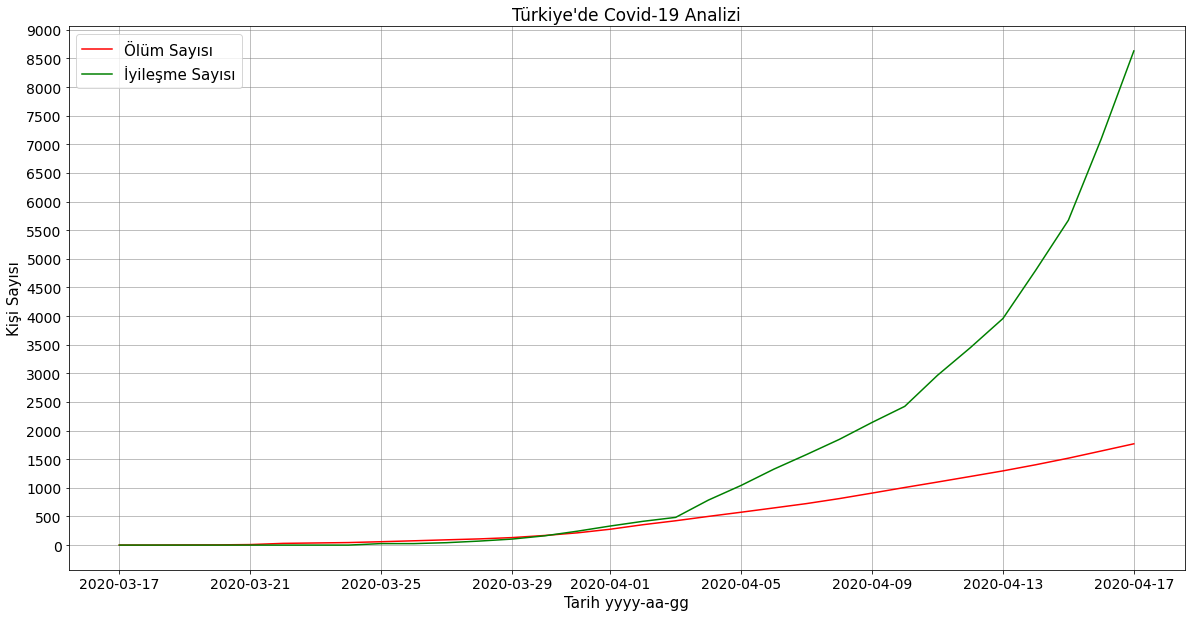

In [112]:
plt.figure(figsize=(20,10))
plt.rc(['xtick','ytick'], labelsize=14)

plt.plot(data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Date'],
         data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Deaths'], c='Red', label = "Ölüm Sayısı")

plt.plot(data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Date'], 
         data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Recovered'], c='Green', label = "İyileşme Sayısı")

plt.xlabel('Tarih yyyy-aa-gg', fontsize=15)
plt.ylabel('Kişi Sayısı', fontsize=15)
plt.title("Türkiye'de Covid-19 Analizi", fontsize=17) 
plt.yticks(np.arange(0, max(data[(data['Country/Region'] == 'Turkey') & (data['Deaths'] != 0)]['Recovered'])+500, 500.0))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(fontsize=15)

In [0]:
dataprc = data[data['Country/Region'] == 'China'][['Date', 'Deaths', 'Confirmed', 'Recovered']]
dataprc['Date'].astype('category')
dataprc = dataprc.groupby('Date').sum()

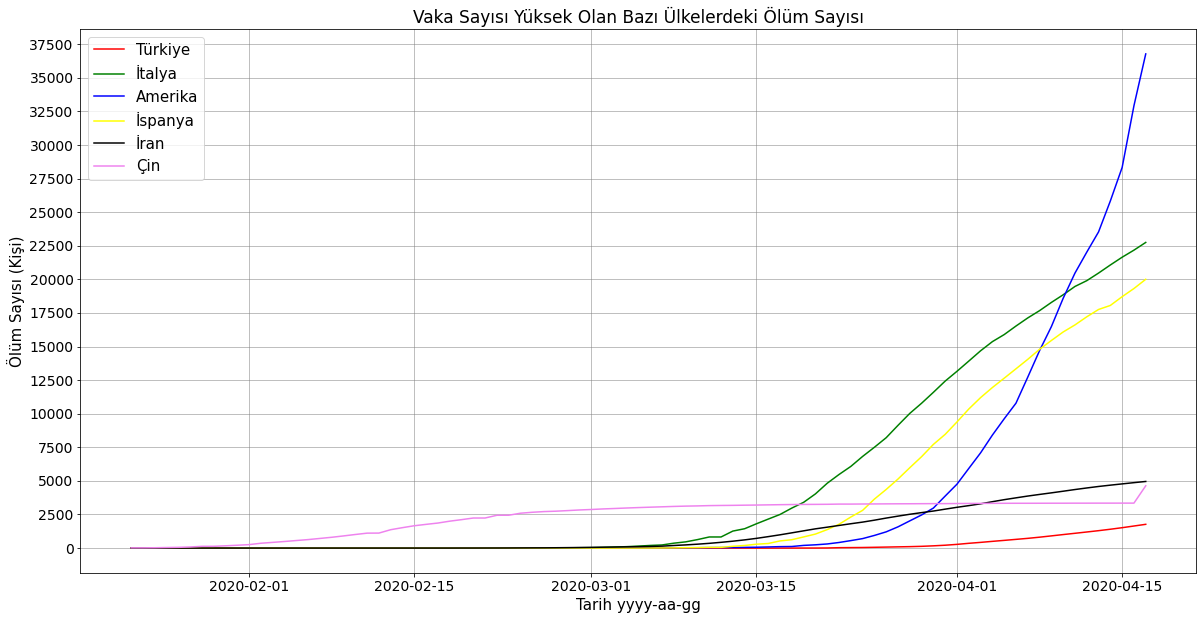

In [114]:
plt.figure(figsize=(20,10))
plt.rc(['xtick','ytick'], labelsize=14)
plt.plot(data[(data['Country/Region'] == 'Turkey')]['Date'], data[(data['Country/Region'] == 'Turkey')]['Deaths'], c='Red', label = "Türkiye")
plt.plot(data[(data['Country/Region'] == 'Italy')]['Date'], data[(data['Country/Region'] == 'Italy')]['Deaths'], c='Green', label = "İtalya")
plt.plot(data[(data['Country/Region'] == 'US')]['Date'], data[(data['Country/Region'] == 'US')]['Deaths'], c='Blue', label = "Amerika")
plt.plot(data[(data['Country/Region'] == 'Spain')]['Date'], data[(data['Country/Region'] == 'Spain')]['Deaths'], c='Yellow', label = "İspanya")
plt.plot(data[(data['Country/Region'] == 'Iran')]['Date'], data[(data['Country/Region'] == 'Iran')]['Deaths'], c='Black', label = "İran")
plt.plot(dataprc.index, dataprc['Deaths'], c='Violet', label = "Çin")
plt.xlabel('Tarih yyyy-aa-gg', fontsize=15)
plt.ylabel('Ölüm Sayısı (Kişi)', fontsize=15)
plt.title("Vaka Sayısı Yüksek Olan Bazı Ülkelerdeki Ölüm Sayısı", fontsize=17)
plt.yticks(np.arange(0, max(data[(data['Country/Region'] == 'US')]['Deaths'])+2500, 2500))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(fontsize=15)

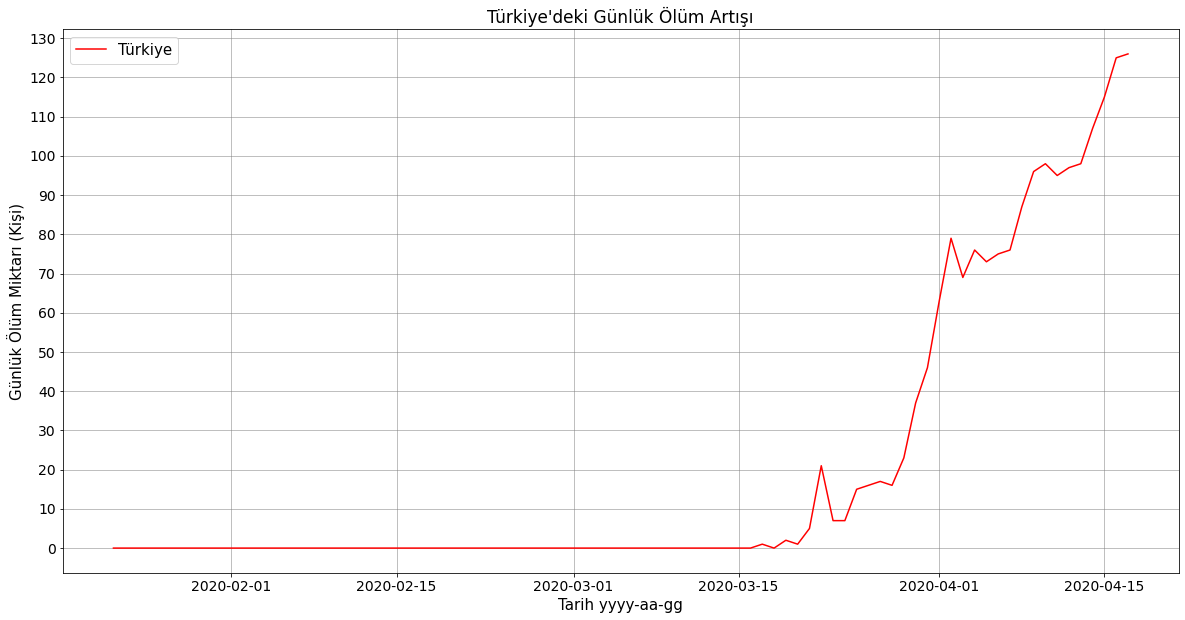

In [115]:
plt.figure(figsize=(20,10))
plt.rc(['xtick','ytick'], labelsize=14)
plt.yticks(np.arange(0, max(artis(data[(data['Country/Region'] == 'Turkey')]['Deaths'].tolist()))+10, 10))
plt.plot(data[(data['Country/Region'] == 'Turkey')]['Date'], artis(data[(data['Country/Region'] == 'Turkey')]['Deaths'].tolist()), c='Red', label = "Türkiye")
plt.xlabel('Tarih yyyy-aa-gg', fontsize=15)
plt.ylabel('Günlük Ölüm Miktarı (Kişi)', fontsize=15)
plt.title("Türkiye'deki Günlük Ölüm Artışı", fontsize=17)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(fontsize=15)

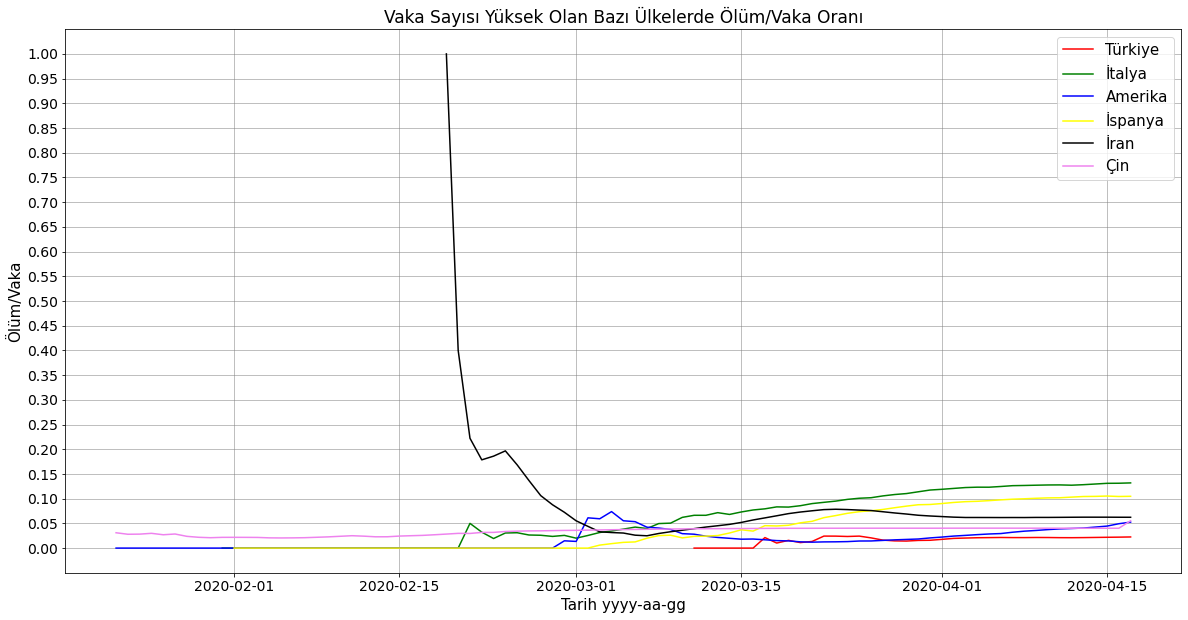

In [116]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.rc(['xtick','ytick'], labelsize=14)

plt.plot(data[(data['Country/Region'] == 'Turkey')]['Date'],
         data[(data['Country/Region'] == 'Turkey')]['Deaths']/data[(data['Country/Region'] == 'Turkey')]['Confirmed'], c='red', label='Türkiye')

plt.plot(data[(data['Country/Region'] == 'Italy')]['Date'],
         data[(data['Country/Region'] == 'Italy')]['Deaths']/data[(data['Country/Region'] == 'Italy')]['Confirmed'], c='Green', label='İtalya')

plt.plot(data[(data['Country/Region'] == 'US')]['Date'],
         data[(data['Country/Region'] == 'US')]['Deaths']/data[(data['Country/Region'] == 'US')]['Confirmed'], c='Blue', label='Amerika')

plt.plot(data[(data['Country/Region'] == 'Spain')]['Date'],
         data[(data['Country/Region'] == 'Spain')]['Deaths']/data[(data['Country/Region'] == 'Spain')]['Confirmed'], c='Yellow', label='İspanya')

plt.plot(data[(data['Country/Region'] == 'Iran')]['Date'],
         data[(data['Country/Region'] == 'Iran')]['Deaths']/data[(data['Country/Region'] == 'Iran')]['Confirmed'], c='Black', label='İran')

plt.plot(dataprc.index, dataprc['Deaths']/dataprc['Confirmed'], c='Violet', label = "Çin")
plt.xlabel('Tarih yyyy-aa-gg', fontsize=15)
plt.ylabel('Ölüm/Vaka', fontsize=15)
plt.title('Vaka Sayısı Yüksek Olan Bazı Ülkelerde Ölüm/Vaka Oranı', fontsize=17)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(fontsize=15)

In [0]:
datatoplam = data[['Date', 'Deaths', 'Confirmed', 'Recovered']].copy()

In [0]:
datatoplam['Date'] = datatoplam['Date'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Dünyadaki Ölüm-Vaka-İyileşme Oranları')

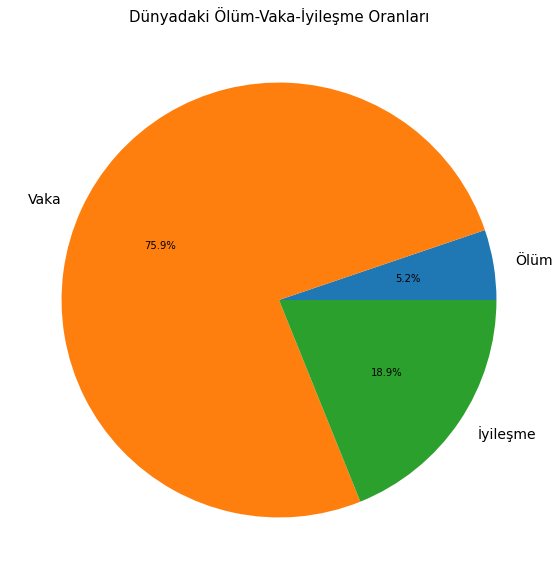

In [119]:
plt.figure(figsize=(10,10))
plt.rc(['xtick','ytick'], labelsize=14)
plt.pie(datatoplam.groupby('Date').sum()[-1:], labels=['Ölüm','Vaka','İyileşme'], autopct='%1.1f%%')
plt.title('Dünyadaki Ölüm-Vaka-İyileşme Oranları', fontsize=15)

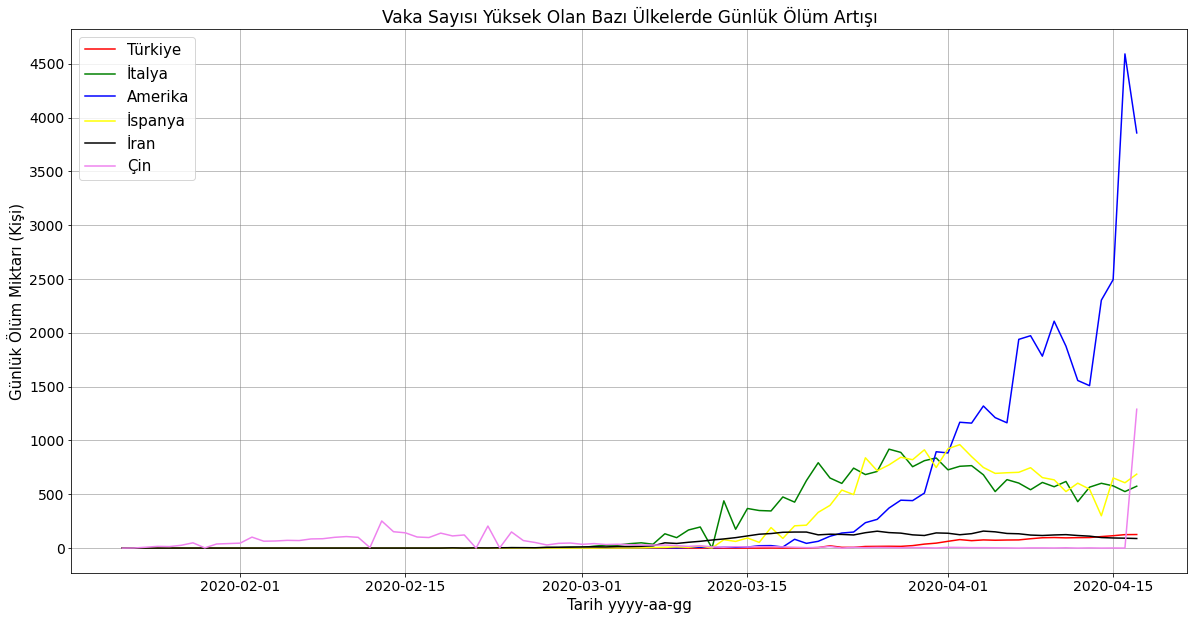

In [120]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0, max(artis(data[(data['Country/Region'] == 'US')]['Deaths'].tolist()))+500, 500))
plt.rc(['xtick','ytick'], labelsize=14)
plt.plot(data[(data['Country/Region'] == 'Turkey')]['Date'], artis(data[(data['Country/Region'] == 'Turkey')]['Deaths'].tolist()), c='Red', label = "Türkiye")
plt.plot(data[(data['Country/Region'] == 'Italy')]['Date'], artis(data[(data['Country/Region'] == 'Italy')]['Deaths'].tolist()), c='Green', label = "İtalya")
plt.plot(data[(data['Country/Region'] == 'US')]['Date'], artis(data[(data['Country/Region'] == 'US')]['Deaths'].tolist()), c='Blue', label = "Amerika")
plt.plot(data[(data['Country/Region'] == 'Spain')]['Date'], artis(data[(data['Country/Region'] == 'Spain')]['Deaths'].tolist()), c='Yellow', label = "İspanya")
plt.plot(data[(data['Country/Region'] == 'Iran')]['Date'], artis(data[(data['Country/Region'] == 'Iran')]['Deaths'].tolist()), c='Black', label = "İran")
plt.plot(dataprc.index, artis(dataprc['Deaths'].tolist()), c='Violet', label = "Çin")
plt.xlabel('Tarih yyyy-aa-gg', fontsize=15)
plt.ylabel('Günlük Ölüm Miktarı (Kişi)', fontsize=15)
plt.title('Vaka Sayısı Yüksek Olan Bazı Ülkelerde Günlük Ölüm Artışı', fontsize=17)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(fontsize=15)

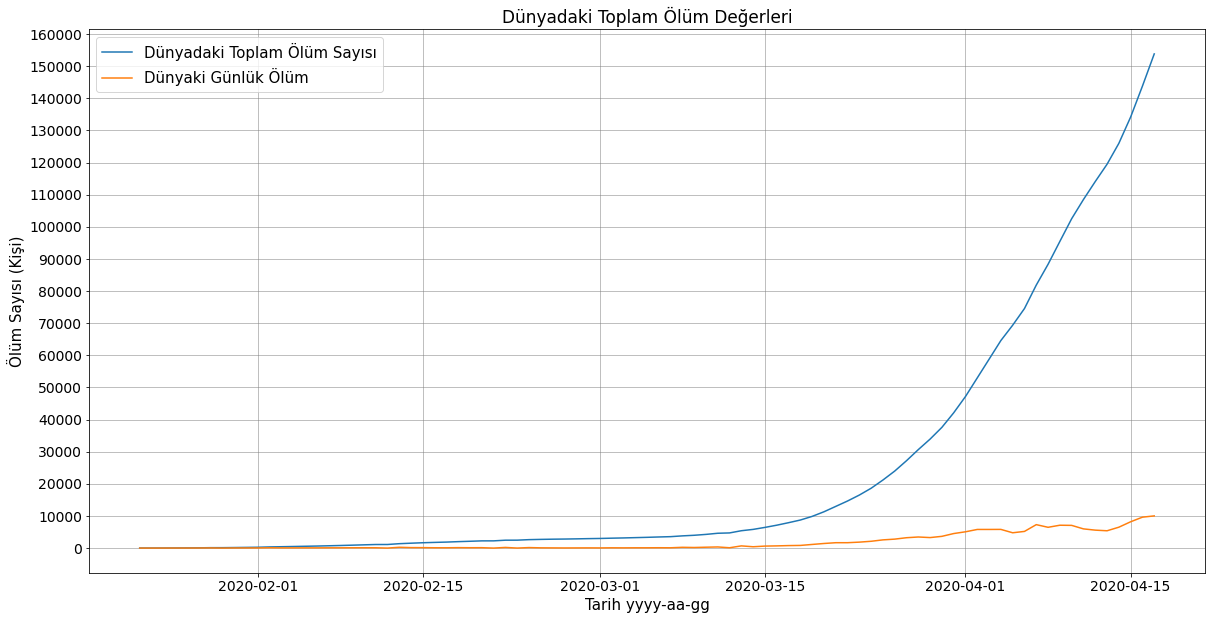

In [136]:
import numpy as np

plt.figure(figsize=(20,10))
plt.rc(['xtick','ytick'], labelsize=14)
plt.plot(datatoplam.groupby('Date').sum().index, datatoplam.groupby('Date').sum()['Deaths'], label = "Dünyadaki Toplam Ölüm Sayısı")
plt.plot(datatoplam.groupby('Date').sum().index, artis(datatoplam.groupby('Date').sum()['Deaths'].tolist()), label = "Dünyaki Günlük Ölüm")
plt.xlabel('Tarih yyyy-aa-gg', fontsize=15)
plt.ylabel('Ölüm Sayısı (Kişi)', fontsize=15)
plt.title('Dünyadaki Toplam Ölüm Değerleri', fontsize=17)
plt.yticks(np.arange(0, max(datatoplam.groupby('Date').sum()['Deaths'])+10000, 10000.0))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend(fontsize=15)

In [0]:
data_doviz = pd.read_csv('https://raw.githubusercontent.com/kynemre/Covid_19/master/USD_TRY%20Ge%C3%A7mi%C5%9F%20Verileri.csv')

In [0]:
def to_float(data, kolon):
  data[kolon] = data[kolon].str.strip('%')
  return data[kolon].str.replace(',','.').astype('float32')


In [0]:
data_doviz['Şimdi'] = to_float(data_doviz, 'Şimdi')
data_doviz['Açılış'] = to_float(data_doviz, 'Açılış')
data_doviz['Yüksek'] = to_float(data_doviz, 'Yüksek')
data_doviz['Düşük'] = to_float(data_doviz, 'Düşük')
data_doviz['Fark %'] = to_float(data_doviz, 'Fark %')


In [0]:
data_doviz['Tarih'] = data_doviz['Tarih'].str.replace(r'(\d+).(\d+).(\d+)', r'\3-\2-\1')
data_doviz['Tarih'] = pd.to_datetime(data_doviz['Tarih'])

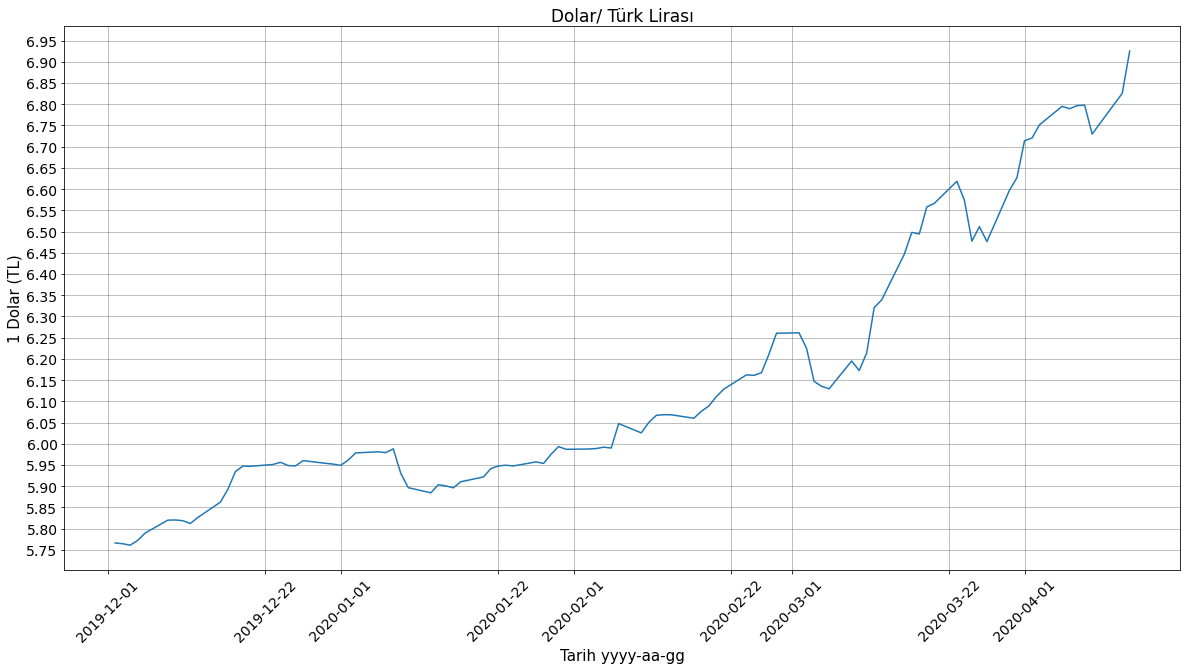

In [126]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0, max(data_doviz['Yüksek'])+0.05, 0.05))
plt.rc(['xtick','ytick'], labelsize=14)
plt.plot(data_doviz['Tarih'],data_doviz['Yüksek'])
plt.xlabel('Tarih yyyy-aa-gg', fontsize=15)
plt.ylabel('1 Dolar (TL)', fontsize=15)
plt.title('Dolar/ Türk Lirası', fontsize=17)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.tick_params(axis ='x', rotation = 45) 

In [0]:
data_ucus_ocak = pd.read_excel('https://raw.githubusercontent.com/kynemre/Covid_19/master/Ucus_Verileri/Ocak.xlsx', header= 2)
data_ucus_subat = pd.read_excel('https://raw.githubusercontent.com/kynemre/Covid_19/master/Ucus_Verileri/%C5%9Eubat.xlsx', header= 2)
data_ucus_mart = pd.read_excel('https://raw.githubusercontent.com/kynemre/Covid_19/master/Ucus_Verileri/Mart.xlsx', header= 2)

In [0]:
data_ucus_ocak.rename(columns={'Unnamed: 0': 'Havalimanı'}, inplace=True)
data_ucus_subat.rename(columns={'Unnamed: 0': 'Havalimanı'}, inplace=True)
data_ucus_mart.rename(columns={'Unnamed: 0': 'Havalimanı'}, inplace=True)

In [0]:
aylar = ['Ocak', 'Subat', 'Mart']
veriler = [[data_ucus_ocak[data_ucus_ocak['Havalimanı'] == 'TÜRKİYE GENELİ'].iloc[0]['Toplam'],
            data_ucus_ocak[data_ucus_ocak['Havalimanı'] == 'TÜRKİYE GENELİ'].iloc[0]['Toplam.1']],
           [data_ucus_subat[data_ucus_subat['Havalimanı'] == 'TÜRKİYE GENELİ'].iloc[0]['Toplam'],
            data_ucus_subat[data_ucus_subat['Havalimanı'] == 'TÜRKİYE GENELİ'].iloc[0]['Toplam.1']],
           [data_ucus_mart[data_ucus_mart['Havalimanı'] == 'TÜRKİYE GENELİ'].iloc[0]['Toplam'],
            data_ucus_mart[data_ucus_mart['Havalimanı'] == 'TÜRKİYE GENELİ'].iloc[0]['Toplam.1']]]
veriler = pd.DataFrame(veriler)
veriler.columns = [2019,2020]
veriler.index = aylar

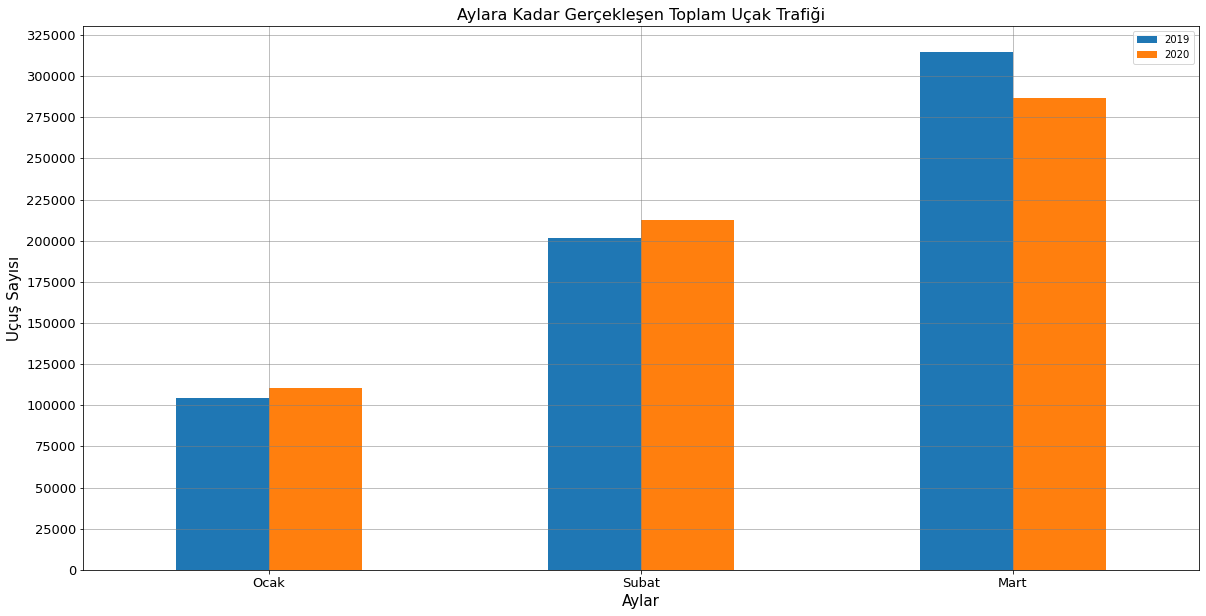

In [130]:
veriler.plot(kind='bar', fontsize=13, figsize=(20,10))
plt.yticks(np.arange(0, veriler[[2019,2020]].max().max()+25000, 25000))
plt.xlabel('Aylar',fontsize=15)
plt.ylabel('Uçuş Sayısı', fontsize=15)
plt.title("Aylara Kadar Gerçekleşen Toplam Uçak Trafiği", fontsize=16)
plt.tick_params(axis ='x', rotation = 0) 
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend()

In [0]:
data_turizm = pd.read_excel('https://raw.githubusercontent.com/kynemre/Covid_19/master/Turizm_Data_Subat.xls', sheet_name= 'Milliyet', header=2)

In [0]:
data_turizm.set_index('MİLLİYET', inplace = True)

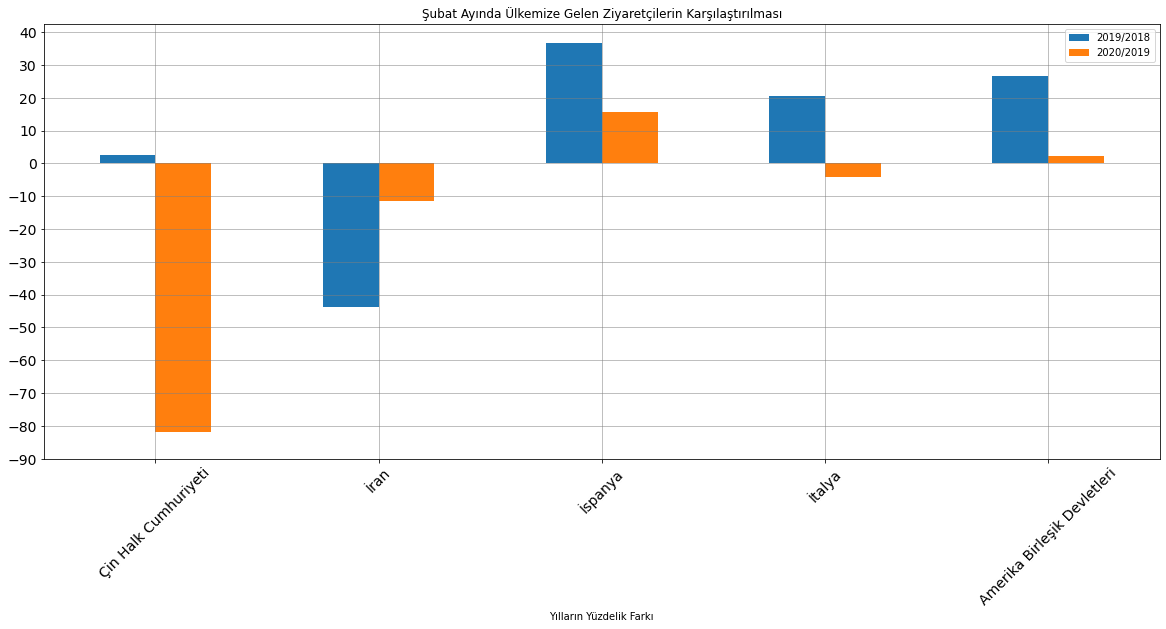

In [133]:
data_tur = data_turizm[(data_turizm.index == 'Çin Halk Cumhuriyeti') | (data_turizm.index == 'İtalya') 
| (data_turizm.index == 'Amerika Birleşik Devletleri') | (data_turizm.index == 'İran')
| (data_turizm.index == 'İspanya')][['2019/2018','2020/2019']].copy()

data_tur.plot(kind='bar', width = 0.5, figsize=(20,8))

plt.yticks(np.arange((data_tur.min().min()//10)*10, data_tur.max().max()+10, 10))
plt.title('Şubat Ayında Ülkemize Gelen Ziyaretçilerin Karşılaştırılması')
plt.xlabel('Yılların Yüzdelik Farkı')
plt.tick_params(axis ='x', rotation = 45) 
plt.grid(color='gray', linestyle='-', linewidth=0.5)


In [134]:
#Doğrusal modelleme
from sklearn.linear_model import LinearRegression#kütüphaneyi yükleme
lr = LinearRegression()#obje oluşturma

#özellikleri ve özelliklerle kestireceğimiz hedeflenen değeri belirleyelim
y = datatoplam.groupby('Date').sum()['Deaths']#hedef, series
x = datatoplam.groupby('Date').sum()[['Confirmed']]#kullanılacak özellik, dataFrame 
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

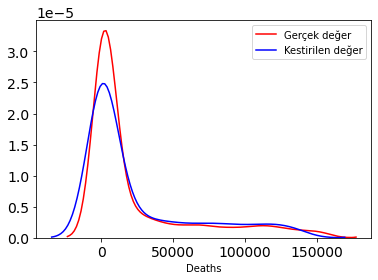

In [135]:
y_kestirilen = lr.predict(x)#modelle mözellikten kestirim yapılması
#Gerçek ve kestirilen değerlerin dağılımlarının çizimi
ax1 = sns.distplot(datatoplam.groupby('Date').sum()['Deaths'],hist=False,color='r',label='Gerçek değer')
sns.distplot(y_kestirilen,hist=False,color='b',label='Kestirilen değer',ax=ax1)